# EDA of famous Titanic dataset

Main goals of EDA:
1. To maximize understanding of a given dataset (how good the data is).
2. To define the most important variables for the analysis.
3. To detect outliers and anomalies.

Main instruments:
* charting (boxplots, histograms, qq-plot, dependencies) - to reveal patterns in our data.
* estimating the parameters of a distribution.

What to do witn NA's:
1. Check if data was collected right.
2. Drop missing values.
3. Remove features with too many NA's.
4. Replace for mean, median (for quantitative data) or mode (for categorical data).
5. Multiple imputation.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
titanic_df = pd.read_csv(r"C:\Evhen\STUDY\datasets\titanic_dataset.csv", sep='\t')

View of the dataset:

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

**Data description:**

**PassengerId**  — unique passenger ID

**Survived** — passenger survived or not (0 - no, 1 - yes)

**Pclass** — cabin class (1, 2, 3)

**Name** — passenger's name

**Sex** — passenger's sex (male, female)

**Age** — passenger's age

**SibSp** — siblings / spouses abroad

**Parch** — number of parents / kids on board

**Ticket** — ticket number

**Fare** — ticket price (british pounds)

**Cabin** — cabin number

**Embarked** — port where passenger boarded (S - Southampton, C - Cherbourg, Q - Queenstown) 

## Quick view of the data

Small info about the data. Checking for nulls:

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


There are too many missing values in Cabin. We will probably delete the whole column/

Descriptive statistics:

In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## Bivariate relationships between variables

The variables pairwise relationships:

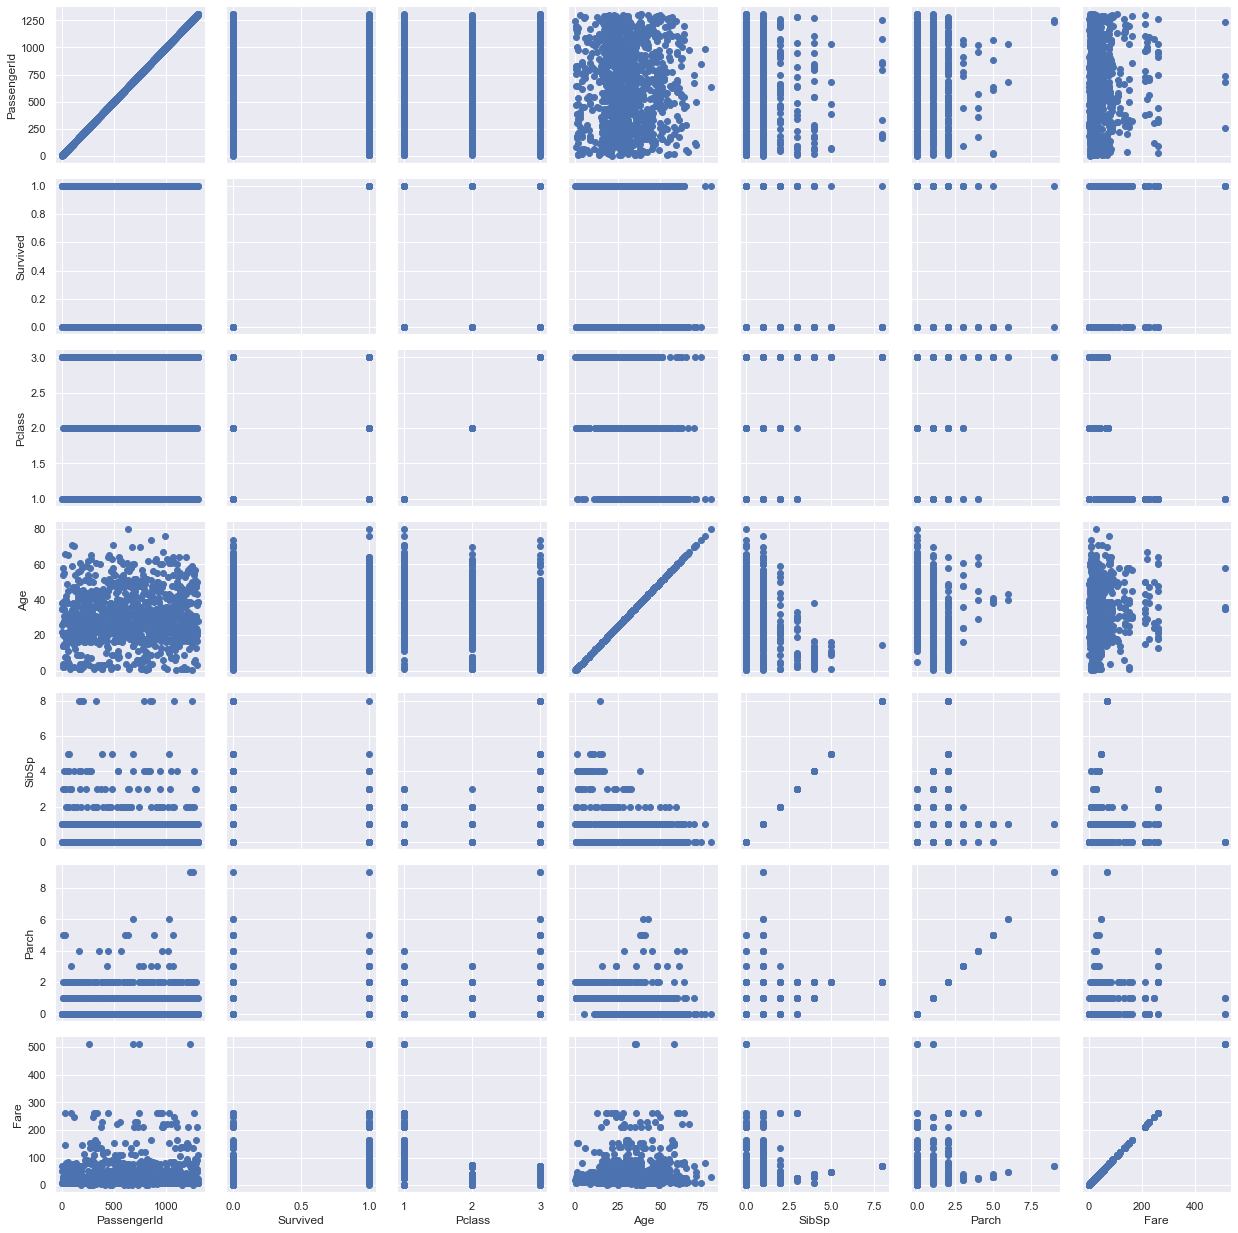

In [8]:
pair_grid_plot = sns.PairGrid(titanic_df)
pair_grid_plot.map(plt.scatter)
sns.despine()

Let's remove columns with too many factors

In [9]:
titanic_subset = titanic_df.copy()
titanic_subset.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [10]:
titanic_subset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,NaN,0,0,8.0500,S


Check the variables pairwise relationships (again) with updated table:

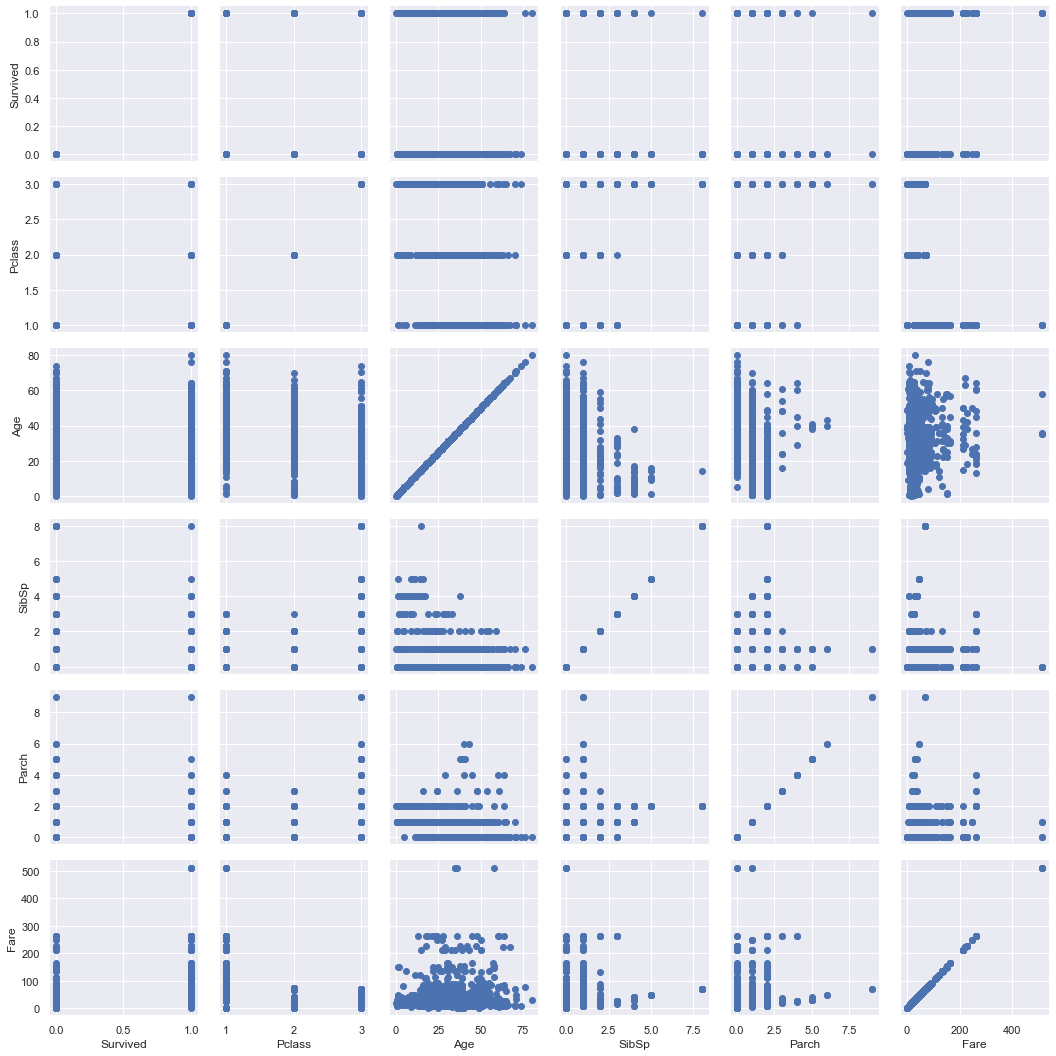

In [11]:
pair_grid_plot_1 = sns.PairGrid(titanic_subset)
pair_grid_plot_1.map(plt.scatter)
sns.despine()

## Age vs. ticket price distribuiton

Let's check the ticket prices and age distributions:

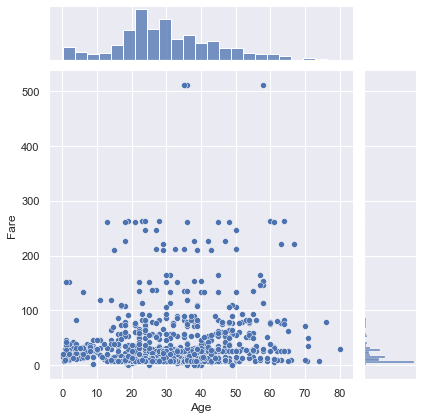

In [12]:
sns.jointplot(x='Age', y='Fare', data=titanic_subset)
sns.despine()

There are more cheap tickets and there are more young-aged passengers. We can't state that ticket fare (or income) clearly depends on passengers age.

## Age distribution

Passengers' ages distribution:

<AxesSubplot:xlabel='Age'>

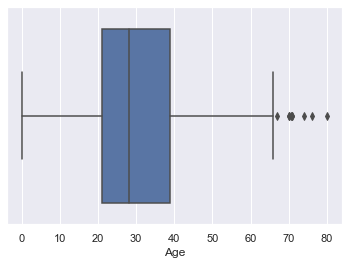

In [13]:
sns.boxplot(x='Age', data=titanic_subset)

There are some outliers. To build super precise model we can drop such values further.

Violin plot may bring us a little bit more insights.

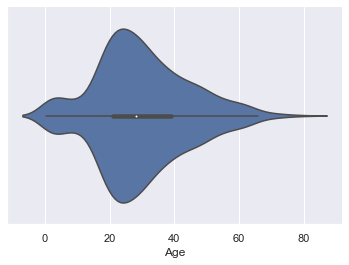

In [14]:
sns.violinplot(x='Age', data = titanic_subset)
sns.despine()

## How many passengers survived?

Percent of survived passengers:  37.74 %


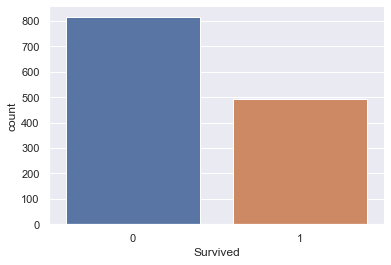

In [15]:
sns.countplot(data=titanic_df, x='Survived')
print('Percent of survived passengers: ', round(100 * titanic_df.Survived.sum() / titanic_df.Survived.count(), 2), '%')
sns.despine()

There were 37.74% of passengers who could survive.

## Does survival depends on passengers' sex?

Does sex impact on surviving?

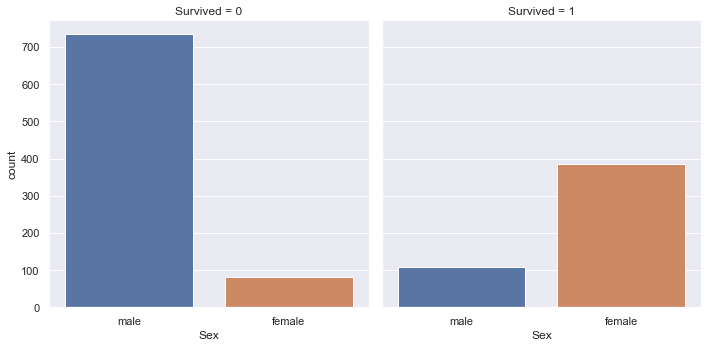

In [16]:
sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
sns.despine()

Sex definetely impacts on surviving.

The same in percents:

In [17]:
titanic_df_ad = (titanic_df.groupby(['Sex'])['Survived']
                             .value_counts(normalize=True).round(2)
                             .to_frame('prcnt').reset_index()
                            )

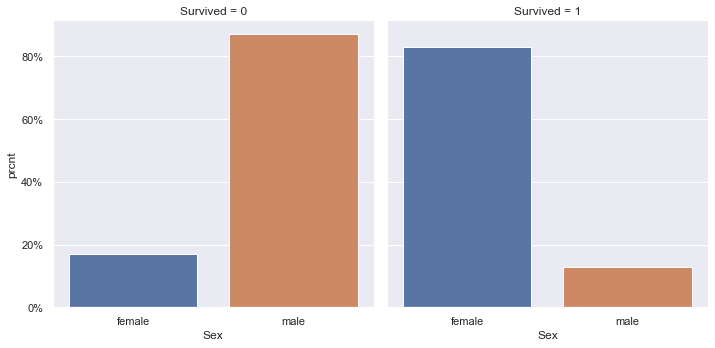

In [18]:
from  matplotlib.ticker import PercentFormatter
p = sns.catplot(x='Sex', y='prcnt', col='Survived', kind='bar', data=titanic_df_ad)
for ax in p.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
sns.despine()

Reaffirmed.

## Does survival depends on passengers' age?

Surviving vs. age with pie charts: 

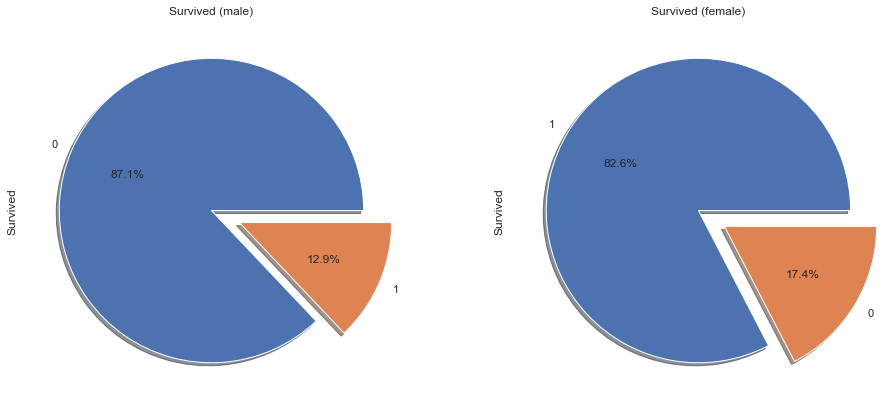

In [19]:
f, ax = plt.subplots(1,2,figsize=(16,7))
titanic_df['Survived'][titanic_df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
titanic_df['Survived'][titanic_df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

## Does survival depends on cabin class?

Let's check if survivng depends on cabin class.

We can use cross tables to explore two or more variables at once.

In [20]:
pd.crosstab(titanic_df.Pclass, titanic_df.Survived, margins=True).style.background_gradient(cmap='Pastel2')

Survived,0,1,All
Pclass,,,
1,137,186,323
2,160,117,277
3,518,191,709
All,815,494,1309


In [21]:
print('Percent of survived by cabin class:')
print('Pclass = 1: ', round(100*titanic_df.query("Pclass==1")['Survived'].sum()/titanic_df.query("Pclass==1")['Survived'].count(), 2), '%')
print('Pclass = 2: ', round(100*titanic_df.query("Pclass==2")['Survived'].sum()/titanic_df.query("Pclass==2")['Survived'].count(), 2), '%')
print('Pclass = 3: ', round(100*titanic_df.query("Pclass==3")['Survived'].sum()/titanic_df.query("Pclass==3")['Survived'].count(), 2), '%')

Percent of survived by cabin class:
Pclass = 1:  57.59 %
Pclass = 2:  42.24 %
Pclass = 3:  26.94 %


Let's check survived vs. Pclass dependency.

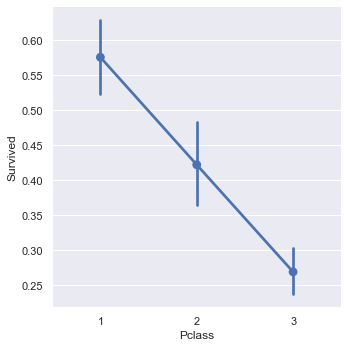

In [22]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df)
sns.despine()

There is a dependency!

## Does survival depends on sex and cabin class?

Cross table for surviving vs. passenger sex and cabin class.

In [23]:
pd.crosstab([titanic_df.Sex, titanic_df.Survived], titanic_df.Pclass, margins=True).style.background_gradient(cmap='Pastel2')

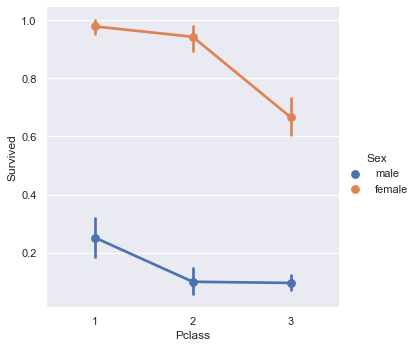

In [24]:
sns.catplot(x='Pclass', y='Survived', kind='point', hue='Sex', data=titanic_df)
sns.despine()

Both females and males survived more if they had first class.

## Does survival depends on embarking port?

In [25]:
pd.crosstab(titanic_df['Survived'], titanic_df['Embarked'], margins=True).style.background_gradient(cmap='Pastel2')

Embarked,C,Q,S,All
Survived,,,,
0,137,69,609,815
1,133,54,305,492
All,270,123,914,1307


Most passengers embarked in Southampton.

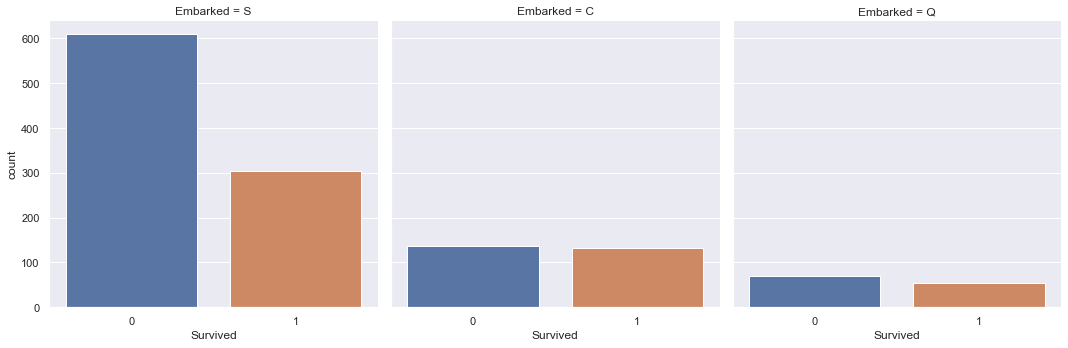

In [26]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=titanic_df)
sns.despine()

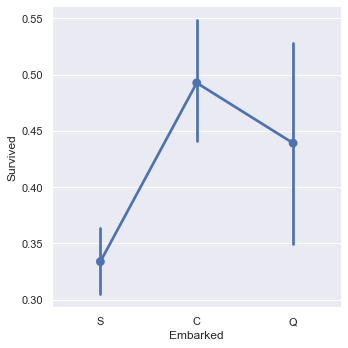

In [27]:
sns.catplot(x='Embarked', y='Survived', kind='point', data=titanic_df)
sns.despine()

Interesting. Almost all passengers embarked in Cherbourg could survive. (Maybe, their cabins were closer to the boats).

## Does survival depends on sex and embarking port?

In [28]:
pd.crosstab([titanic_df.Sex, titanic_df.Survived], titanic_df.Embarked, margins=True).style.background_gradient(cmap='Pastel2')

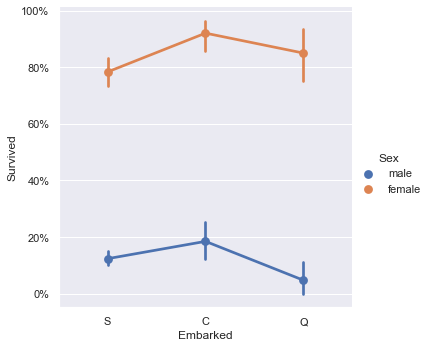

In [29]:
# We can display y-axis in percent
from  matplotlib.ticker import PercentFormatter
p = sns.catplot(x='Embarked', y='Survived', hue='Sex', kind='point', data=titanic_df)
for ax in p.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
sns.despine()

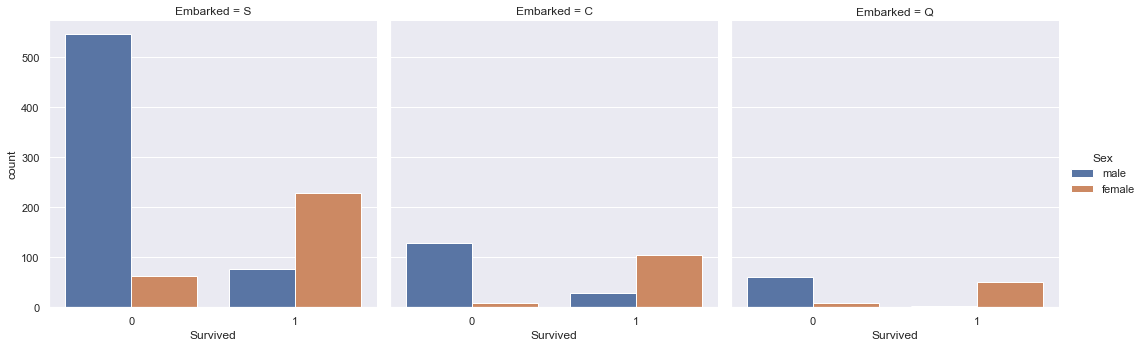

In [30]:
sns.catplot(x='Survived', col='Embarked', hue='Sex', kind='count', data=titanic_df)
sns.despine()

Again, both female and male passengers embarked in Cherbourg survived more (in a percentage).

## Does survival depends on sex, embarking port and cabin class?

In [31]:
pd.crosstab(titanic_df.Survived, [titanic_df.Sex, titanic_df.Pclass, titanic_df.Embarked], margins=True).style.background_gradient(cmap='Pastel2')

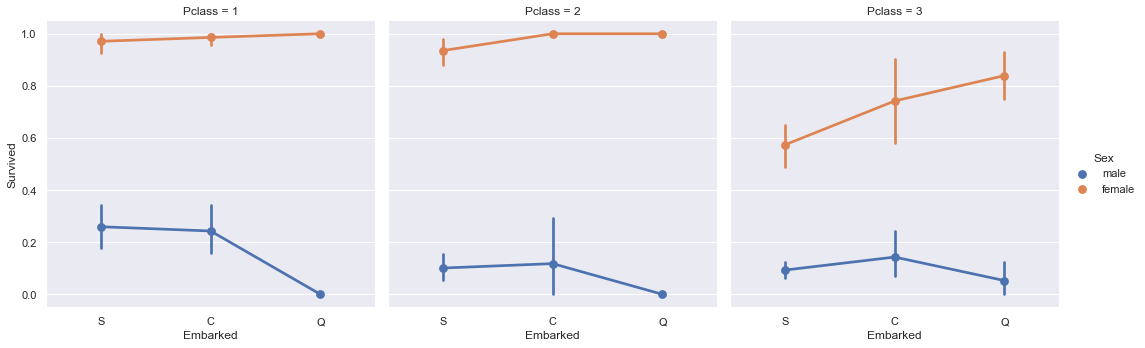

In [32]:
sns.catplot(x='Embarked', y='Survived', col='Pclass', hue='Sex', data=titanic_df, kind='point')
sns.despine()

There were no visible difference between survival chance for **female** in class 1 and 2.  
And there were no visible difference between survival chance for **male** in class 2 and 3.

## Survival vs. age bins

Sometitimes, it may be useful to analyze variable distribution by bins.

In [33]:
labels = ['<16', '16-25', '26-40', '41-55', '55+']

titanic_df['Age_bin'] = pd.cut(titanic_df['Age'], [0, 16, 25, 40, 55, 80], labels=labels)

In [34]:
titanic_df[['Age', 'Age_bin']].head()

,Age,Age_bin
0,22.0,16-25
1,38.0,26-40
2,26.0,26-40
3,35.0,26-40
4,35.0,26-40


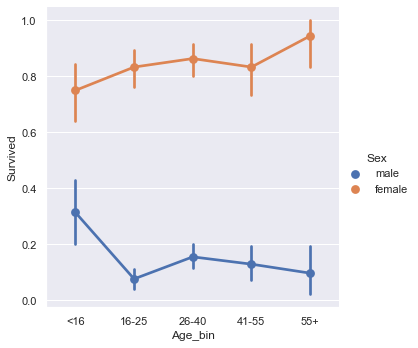

In [35]:
sns.catplot(x='Age_bin', y='Survived', hue='Sex', data=titanic_df, kind='point')
sns.despine()

**Male kids** visibly had bigger chances to survive than male passengers of other ages.  
And **older women** had bigger chances to survive too.

In [36]:
pd.crosstab([titanic_df.Sex, titanic_df.Survived], titanic_df.Age_bin, margins=True).style.background_gradient(cmap='Pastel2')

## Survival vs. fare bins

Fare distribution:

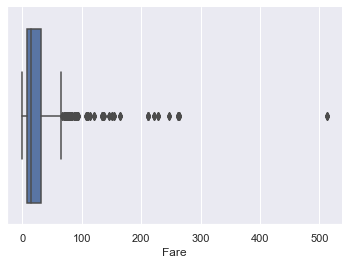

In [37]:
sns.boxplot(x='Fare', data=titanic_df)
sns.despine()

In [38]:
titanic_df.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [39]:
# Divide fare by percentiles
labels = [i for i in range(1,11)]
titanic_df['Fare_bin'] = pd.qcut(titanic_df['Fare'], labels=labels, q=10)

In [40]:
pd.crosstab([titanic_df.Sex, titanic_df.Survived], titanic_df.Fare_bin, margins=True).style.background_gradient(cmap='Pastel2')

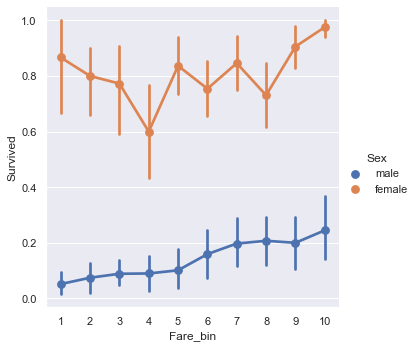

In [41]:
sns.catplot(x='Fare_bin', y='Survived', hue='Sex', data=titanic_df, kind='point')
sns.despine()

For females we see a drop of survival rate for 4th percentile.  
And males have a visible correlation between fare bins and survival rate. 

## Correlation between all variables

We can see at correlation between all variables and consider which variables may be useful in further analysis.

In [42]:
titanic_df_1 = titanic_df.copy()
titanic_df_1 = titanic_df_1[['Survived', 'Pclass', 'Age', 'Sex', 'Fare', 'Embarked']]

In [43]:
# Let's transform categorical variables into numeric dummy values
titanic_df_1 = pd.get_dummies(titanic_df_1, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
titanic_df_1.dropna(inplace=True)

Correlation matrix:

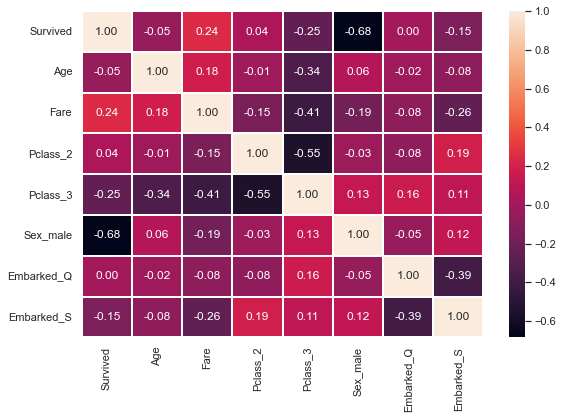

In [44]:
corr = titanic_df_1.corr()

f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5, fmt = '.2f', ax=ax)
plt.show()

We can see a correlation between survival and sex.

Obviously, it's better not to be a man on Titanic.

# Automatic EDA with pandas_profiling

In [45]:
# pip install -U pandas-profiling

In [46]:
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [47]:
titanic_df.drop(columns=['Age_bin', 'Fare_bin'], inplace=True)

In [48]:
from pandas_profiling import ProfileReport

In [49]:
profile = ProfileReport(titanic_df, title = 'Titanic Dataset Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Fin.